In [1]:
import pandas as pd
import numpy as np

In [2]:
mobile=pd.read_csv('Mobile phone price - Mobile phone price.csv')
mobile

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [3]:
mobile['Storage']=[int(str.replace("GB","").strip()) for str in mobile['Storage'] ]
mobile['RAM']=[int(str.replace("GB","").replace(" ","")) for str in mobile['RAM'] ]
mobile['Screen Size (inches)']=[float(str.replace("(unfolded)","").replace(" ","").replace("6.8+3.9","10.7")) for str in mobile['Screen Size (inches)']]
mobile['Price ($)']=[int(str.replace('$',"").replace(" ","").replace(',',"")) for str in mobile['Price ($)']]

In [4]:
mobile['Camera (MP)']=[str.replace("MP","").replace(" ","") for str in mobile['Camera (MP)']]

In [5]:
mobile['Camera-1']=["" for ind in mobile.index]
mobile['Camera-2']=["" for ind in mobile.index]
mobile['Camera-3']=["" for ind in mobile.index]
mobile['Camera-4']=["" for ind in mobile.index]
mobile

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Camera-1,Camera-2,Camera-3,Camera-4
0,Apple,iPhone 13 Pro,128,6,6.10,12+12+12,3095,999,,,,
1,Samsung,Galaxy S21 Ultra,256,12,6.80,108+10+10+12,5000,1199,,,,
2,OnePlus,9 Pro,128,8,6.70,48+50+8+2,4500,899,,,,
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64+8+5+2,5020,279,,,,
4,Google,Pixel 6,128,8,6.40,50+12.2,4614,799,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.70,12+64+12,4300,1049,,,,
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349,,,,
404,Apple,iPhone 12 Pro Max,128,6,6.70,12+12+12,3687,1099,,,,
405,Oppo,Reno3,128,8,6.40,48+13+8+2,4025,429,,,,


In [6]:
for ind in mobile.index :
    i=1
    for ch in mobile['Camera (MP)'][ind]:
        if ch=='+':
            i+=1
        else :
            mobile[f'Camera-{i}'][ind]+=ch

/tmp/ipykernel_4170/1565452127.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile[f'Camera-{i}'][ind]+=ch


In [7]:
mobile['Camera-1']=[float(str if str!='' else '0') for str in mobile['Camera-1']]
mobile['Camera-2']=[float(str if str!='' else '0') for str in mobile['Camera-2']]
mobile['Camera-3']=[float(str if str!='' else '0') for str in mobile['Camera-3']]
mobile['Camera-4']=[str.replace('3D','108').replace('ToF','64') for str in mobile['Camera-4']]
mobile['Camera-4']=[float(str if str!='' else '0') for str in mobile['Camera-4']]

In [8]:
dummies=pd.get_dummies(mobile['Brand'])
mobile=pd.concat([mobile,dummies],axis=1)

In [9]:
mobile.drop(['Brand','Model','Camera (MP)'],inplace=True,axis=1)
y=mobile['Price ($)']
x=mobile.drop(['Price ($)'],axis=1)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
import keras
from keras import Model,Input
from keras.layers import Dense

2023-04-06 15:44:41.383630: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 15:44:41.535614: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-06 15:44:41.535634: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-06 15:44:42.106824: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [12]:
inp=Input(shape=(24,))
l1=Dense(30,activation="tanh")(inp)
l2=Dense(10,activation="relu")(l1)
out=Dense(1,activation="linear")(l2)
model=Model(inputs=inp,outputs=out)

2023-04-06 15:44:42.689528: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-06 15:44:42.689554: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-06 15:44:42.689572: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (student12): /proc/driver/nvidia/version does not exist
2023-04-06 15:44:42.689730: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(optimizer="adam",loss="mse",metrics="mse")

In [14]:
history=model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=500,shuffle=True)

Epoch 1/500
11/11 [==============================] - 1s 17ms/step - loss: 261317.2656 - mse: 261317.2656 - val_loss: 235120.3906 - val_mse: 235120.3906
Epoch 2/500
11/11 [==============================] - 0s 4ms/step - loss: 261013.7031 - mse: 261013.7031 - val_loss: 234886.5312 - val_mse: 234886.5312
Epoch 3/500
11/11 [==============================] - 0s 4ms/step - loss: 260769.4844 - mse: 260769.4844 - val_loss: 234635.1719 - val_mse: 234635.1719
Epoch 4/500
11/11 [==============================] - 0s 4ms/step - loss: 260507.3906 - mse: 260507.3906 - val_loss: 234361.7344 - val_mse: 234361.7344
Epoch 5/500
11/11 [==============================] - 0s 4ms/step - loss: 260222.9219 - mse: 260222.9219 - val_loss: 234067.6406 - val_mse: 234067.6406
Epoch 6/500
11/11 [==============================] - 0s 4ms/step - loss: 259915.8594 - mse: 259915.8594 - val_loss: 233748.8125 - val_mse: 233748.8125
Epoch 7/500
11/11 [==============================] - 0s 4ms/step - loss: 259581.6406 - mse: 2

Epoch 55/500
11/11 [==============================] - 0s 4ms/step - loss: 215020.3125 - mse: 215020.3125 - val_loss: 188797.8750 - val_mse: 188797.8750
Epoch 56/500
11/11 [==============================] - 0s 4ms/step - loss: 213615.5312 - mse: 213615.5312 - val_loss: 187405.1406 - val_mse: 187405.1406
Epoch 57/500
11/11 [==============================] - 0s 4ms/step - loss: 212171.7656 - mse: 212171.7656 - val_loss: 185966.8125 - val_mse: 185966.8125
Epoch 58/500
11/11 [==============================] - 0s 4ms/step - loss: 210748.8281 - mse: 210748.8281 - val_loss: 184540.3594 - val_mse: 184540.3594
Epoch 59/500
11/11 [==============================] - 0s 4ms/step - loss: 209324.7031 - mse: 209324.7031 - val_loss: 183144.6875 - val_mse: 183144.6875
Epoch 60/500
11/11 [==============================] - 0s 4ms/step - loss: 207928.2969 - mse: 207928.2969 - val_loss: 181791.5156 - val_mse: 181791.5156
Epoch 61/500
11/11 [==============================] - 0s 4ms/step - loss: 206520.5938 - 

Epoch 109/500
11/11 [==============================] - 0s 4ms/step - loss: 141416.0312 - mse: 141416.0312 - val_loss: 116491.8516 - val_mse: 116491.8516
Epoch 110/500
11/11 [==============================] - 0s 4ms/step - loss: 140255.1875 - mse: 140255.1875 - val_loss: 115399.0000 - val_mse: 115399.0000
Epoch 111/500
11/11 [==============================] - 0s 4ms/step - loss: 139138.6406 - mse: 139138.6406 - val_loss: 114317.8516 - val_mse: 114317.8516
Epoch 112/500
11/11 [==============================] - 0s 4ms/step - loss: 138047.0625 - mse: 138047.0625 - val_loss: 113256.1719 - val_mse: 113256.1719
Epoch 113/500
11/11 [==============================] - 0s 3ms/step - loss: 136954.4688 - mse: 136954.4688 - val_loss: 112252.0703 - val_mse: 112252.0703
Epoch 114/500
11/11 [==============================] - 0s 4ms/step - loss: 135920.8125 - mse: 135920.8125 - val_loss: 111240.0469 - val_mse: 111240.0469
Epoch 115/500
11/11 [==============================] - 0s 4ms/step - loss: 134873.

11/11 [==============================] - 0s 4ms/step - loss: 102216.6797 - mse: 102216.6797 - val_loss: 78972.7656 - val_mse: 78972.7656
Epoch 164/500
11/11 [==============================] - 0s 4ms/step - loss: 101863.7109 - mse: 101863.7109 - val_loss: 78681.1250 - val_mse: 78681.1250
Epoch 165/500
11/11 [==============================] - 0s 4ms/step - loss: 101548.6016 - mse: 101548.6016 - val_loss: 78406.1562 - val_mse: 78406.1562
Epoch 166/500
11/11 [==============================] - 0s 5ms/step - loss: 101228.9766 - mse: 101228.9766 - val_loss: 78075.4609 - val_mse: 78075.4609
Epoch 167/500
11/11 [==============================] - 0s 4ms/step - loss: 100898.4375 - mse: 100898.4375 - val_loss: 77755.5078 - val_mse: 77755.5078
Epoch 168/500
11/11 [==============================] - 0s 5ms/step - loss: 100599.5938 - mse: 100599.5938 - val_loss: 77498.6172 - val_mse: 77498.6172
Epoch 169/500
11/11 [==============================] - 0s 5ms/step - loss: 100316.5469 - mse: 100316.5469 - 

Epoch 218/500
11/11 [==============================] - 0s 4ms/step - loss: 94514.9219 - mse: 94514.9219 - val_loss: 72111.8750 - val_mse: 72111.8750
Epoch 219/500
11/11 [==============================] - 0s 4ms/step - loss: 94501.9844 - mse: 94501.9844 - val_loss: 72094.3047 - val_mse: 72094.3047
Epoch 220/500
11/11 [==============================] - 0s 4ms/step - loss: 94483.1797 - mse: 94483.1797 - val_loss: 72082.6562 - val_mse: 72082.6562
Epoch 221/500
11/11 [==============================] - 0s 3ms/step - loss: 94457.4219 - mse: 94457.4219 - val_loss: 72068.1250 - val_mse: 72068.1250
Epoch 222/500
11/11 [==============================] - 0s 4ms/step - loss: 94446.2812 - mse: 94446.2812 - val_loss: 72054.8281 - val_mse: 72054.8281
Epoch 223/500
11/11 [==============================] - 0s 4ms/step - loss: 94424.1016 - mse: 94424.1016 - val_loss: 72040.0391 - val_mse: 72040.0391
Epoch 224/500
11/11 [==============================] - 0s 4ms/step - loss: 94413.1719 - mse: 94413.1719 - 

Epoch 273/500
11/11 [==============================] - 0s 4ms/step - loss: 94070.9766 - mse: 94070.9766 - val_loss: 71849.4844 - val_mse: 71849.4844
Epoch 274/500
11/11 [==============================] - 0s 4ms/step - loss: 94068.2891 - mse: 94068.2891 - val_loss: 71851.0938 - val_mse: 71851.0938
Epoch 275/500
11/11 [==============================] - 0s 3ms/step - loss: 94068.0312 - mse: 94068.0312 - val_loss: 71850.6797 - val_mse: 71850.6797
Epoch 276/500
11/11 [==============================] - 0s 4ms/step - loss: 94068.1328 - mse: 94068.1328 - val_loss: 71849.4688 - val_mse: 71849.4688
Epoch 277/500
11/11 [==============================] - 0s 4ms/step - loss: 94078.7969 - mse: 94078.7969 - val_loss: 71847.4531 - val_mse: 71847.4531
Epoch 278/500
11/11 [==============================] - 0s 4ms/step - loss: 94074.5859 - mse: 94074.5859 - val_loss: 71848.1719 - val_mse: 71848.1719
Epoch 279/500
11/11 [==============================] - 0s 4ms/step - loss: 94071.6172 - mse: 94071.6172 - 

Epoch 328/500
11/11 [==============================] - 0s 4ms/step - loss: 94070.6719 - mse: 94070.6719 - val_loss: 71847.9297 - val_mse: 71847.9297
Epoch 329/500
11/11 [==============================] - 0s 4ms/step - loss: 94073.4609 - mse: 94073.4609 - val_loss: 71846.7578 - val_mse: 71846.7578
Epoch 330/500
11/11 [==============================] - 0s 4ms/step - loss: 94073.7734 - mse: 94073.7734 - val_loss: 71847.1250 - val_mse: 71847.1250
Epoch 331/500
11/11 [==============================] - 0s 4ms/step - loss: 94077.4922 - mse: 94077.4922 - val_loss: 71846.8516 - val_mse: 71846.8516
Epoch 332/500
11/11 [==============================] - 0s 4ms/step - loss: 94073.0781 - mse: 94073.0781 - val_loss: 71846.8828 - val_mse: 71846.8828
Epoch 333/500
11/11 [==============================] - 0s 4ms/step - loss: 94075.0234 - mse: 94075.0234 - val_loss: 71847.7422 - val_mse: 71847.7422
Epoch 334/500
11/11 [==============================] - 0s 4ms/step - loss: 94074.2344 - mse: 94074.2344 - 

Epoch 383/500
11/11 [==============================] - 0s 4ms/step - loss: 94075.3984 - mse: 94075.3984 - val_loss: 71894.7656 - val_mse: 71894.7656
Epoch 384/500
11/11 [==============================] - 0s 4ms/step - loss: 94072.9688 - mse: 94072.9688 - val_loss: 71901.0391 - val_mse: 71901.0391
Epoch 385/500
11/11 [==============================] - 0s 4ms/step - loss: 94074.1172 - mse: 94074.1172 - val_loss: 71903.1328 - val_mse: 71903.1328
Epoch 386/500
11/11 [==============================] - 0s 5ms/step - loss: 94075.3125 - mse: 94075.3125 - val_loss: 71900.4766 - val_mse: 71900.4766
Epoch 387/500
11/11 [==============================] - 0s 4ms/step - loss: 94074.5312 - mse: 94074.5312 - val_loss: 71897.1172 - val_mse: 71897.1172
Epoch 388/500
11/11 [==============================] - 0s 4ms/step - loss: 94075.4531 - mse: 94075.4531 - val_loss: 71886.4688 - val_mse: 71886.4688
Epoch 389/500
11/11 [==============================] - 0s 4ms/step - loss: 94082.4609 - mse: 94082.4609 - 

Epoch 438/500
11/11 [==============================] - 0s 4ms/step - loss: 94065.7891 - mse: 94065.7891 - val_loss: 71880.1094 - val_mse: 71880.1094
Epoch 439/500
11/11 [==============================] - 0s 3ms/step - loss: 94067.5078 - mse: 94067.5078 - val_loss: 71882.9531 - val_mse: 71882.9531
Epoch 440/500
11/11 [==============================] - 0s 4ms/step - loss: 94069.7422 - mse: 94069.7422 - val_loss: 71880.8516 - val_mse: 71880.8516
Epoch 441/500
11/11 [==============================] - 0s 4ms/step - loss: 94065.6094 - mse: 94065.6094 - val_loss: 71883.0469 - val_mse: 71883.0469
Epoch 442/500
11/11 [==============================] - 0s 4ms/step - loss: 94069.1719 - mse: 94069.1719 - val_loss: 71884.4688 - val_mse: 71884.4688
Epoch 443/500
11/11 [==============================] - 0s 4ms/step - loss: 94068.5625 - mse: 94068.5625 - val_loss: 71876.9766 - val_mse: 71876.9766
Epoch 444/500
11/11 [==============================] - 0s 3ms/step - loss: 94069.3906 - mse: 94069.3906 - 

Epoch 493/500
11/11 [==============================] - 0s 3ms/step - loss: 94081.9062 - mse: 94081.9062 - val_loss: 71876.6406 - val_mse: 71876.6406
Epoch 494/500
11/11 [==============================] - 0s 4ms/step - loss: 94084.2656 - mse: 94084.2656 - val_loss: 71884.0859 - val_mse: 71884.0859
Epoch 495/500
11/11 [==============================] - 0s 4ms/step - loss: 94067.6094 - mse: 94067.6094 - val_loss: 71883.2344 - val_mse: 71883.2344
Epoch 496/500
11/11 [==============================] - 0s 4ms/step - loss: 94072.3203 - mse: 94072.3203 - val_loss: 71886.6016 - val_mse: 71886.6016
Epoch 497/500
11/11 [==============================] - 0s 4ms/step - loss: 94073.4766 - mse: 94073.4766 - val_loss: 71885.9219 - val_mse: 71885.9219
Epoch 498/500
11/11 [==============================] - 0s 4ms/step - loss: 94075.4922 - mse: 94075.4922 - val_loss: 71890.4219 - val_mse: 71890.4219
Epoch 499/500
11/11 [==============================] - 0s 4ms/step - loss: 94071.6406 - mse: 94071.6406 - 

In [15]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 71907.2812 - mse: 71907.2812


[71907.28125, 71907.28125]

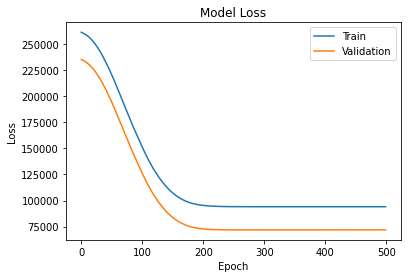

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc="upper right")